<a href="https://colab.research.google.com/github/imanekn/Fake-News-Detection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import string
import re
import torch
import nltk
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Data-FakeRealCOVID.xlsx to Data-FakeRealCOVID.xlsx


In [98]:
data = pd.read_excel('Data-FakeRealCOVID.xlsx')


In [74]:
data.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [8]:
data.describe()

,id
count,6420.000000
mean,3210.500000
std,1853.438696
min,1.000000
25%,1605.750000
50%,3210.500000
75%,4815.250000
max,6420.000000


In [10]:
data.dtypes

id        int64
tweet    object
label    object
dtype: object

In [5]:
#Check if there are any missing values
data.isna().sum()

id       0
tweet    0
label    0
dtype: int64

In [6]:
#Remove missing data
data.dropna()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real
...,...,...,...
6415,6416,A tiger tested positive for COVID-19 please st...,fake
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,fake
6417,6418,_A post claims a COVID-19 vaccine has already ...,fake
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,fake


Plotting


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(8,7)})

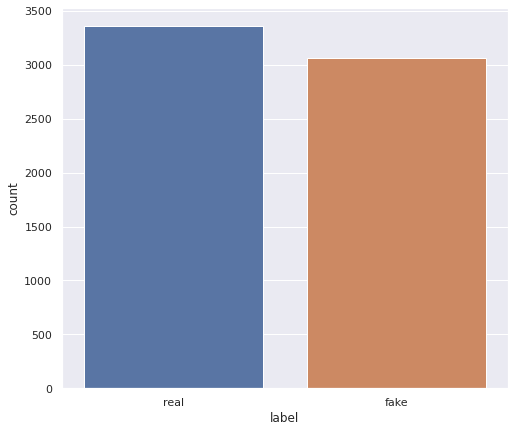

In [18]:
sns.countplot(x='label', data=data)

### **DATA CLEANING**





In [39]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [40]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

*Using the function below, we will clean our text :*

In [142]:
def clean(text):

  lemmatizer = WordNetLemmatizer()
  stop_words = stopwords.words('english')

  #Lowercase
  text = text.lower()

  #Removing punctuation
  text = text.translate(str.maketrans('', '', string.punctuation))
  
  #Removing Non Alpha Numeric characters 
  text = re.sub('[^0-9a-zA-Z]+', ' ', text) 

  #Removing urls
  text = re.sub(r'https.+', '', text, flags=re.MULTILINE)
  
  
  words = [x for x in text.split(" ") if len(x)>1]
  #Removing usernames
  words = [x for x in words if x[0] is not "@"]

  #Removing tags
  words = [x for x in words if x[0] is not "#"]

  #Removing stopwords
  words = [x for x in words if x  not in stop_words]

  #Lemmatization
  words = [lemmatizer.lemmatize(x) for x in words if len(x)>1 ]

  return words


In [143]:
def preprocess(x):
  x = x.apply(lambda x : clean(x))

  y = x.copy(deep=True)
  for i in range (y.shape[0]):
    y[i] = " ".join(x[i])
  return y

In [144]:
data = pd.read_excel('Data-FakeRealCOVID.xlsx')

In [145]:
data["tweet"] = preprocess(data["tweet"])

In [148]:
data["tweet"][12]

'announced first participant age cohort dosed phase study mrna vaccine mrna1273 novel coronavirus read'

In [149]:
#Loading preprocessed data
data.to_csv("Data-FakeRealCOVID.csv", index=False)

### **Feature Extraction**



In [135]:
df = pd.read_csv("Data-FakeRealCOVID.csv")
x = df["tweet"]
y = df["label"]
# Splitting data
x_train, x_test, y_train, y_test = train_test_split(df["tweet"], df["label"], test_size=0.2, random_state=42, shuffle=True)

In [ ]:
#lowercase, éliminer les caractères spéciaux et les urls : 
def data_clean(text) :
  text = text.lower()
  text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
  '''
  text = re.sub('\[.*?\]','',text)
  text = re.sub('[^0-9a-zA-Z]+', ' ', text) #substituer les caractères non alpha numériques
  text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text, flags=re.MULTILINE)
  #text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE) 
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)   
  ''' 
  return text


In [ ]:
data["tweet"] = data["tweet"].apply(data_clean)

In [ ]:
data

,id,tweet,label
0,1,the cdc currently reports 99031 deaths in gene...,real
1,2,states reported 1121 deaths a small rise from ...,real
2,3,politically correct woman almost uses pandemic...,fake
3,4,indiafightscorona we have 1524 covid testing l...,real
4,5,populous states can generate large case counts...,real
...,...,...,...
6415,6416,a tiger tested positive for covid19 please sta...,fake
6416,6417,autopsies prove that covid19 is a blood clot n...,fake
6417,6418,a post claims a covid19 vaccine has already be...,fake
6418,6419,aamir khan donate 250 cr in pm relief cares fund,fake


In [ ]:
#Removing Stopwords

from nltk.corpus import stopwords

stop_words = stopwords.words('english')

data['tweet_without_stopwords'] = data['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

data

,id,tweet,label,tweet_without_stopwords
0,1,the cdc currently reports 99031 deaths in gene...,real,cdc currently reports 99031 deaths general dis...
1,2,states reported 1121 deaths a small rise from ...,real,states reported 1121 deaths small rise last tu...
2,3,politically correct woman almost uses pandemic...,fake,politically correct woman almost uses pandemic...
3,4,indiafightscorona we have 1524 covid testing l...,real,indiafightscorona 1524 covid testing laborator...
4,5,populous states can generate large case counts...,real,populous states generate large case counts loo...
...,...,...,...,...
6415,6416,a tiger tested positive for covid19 please sta...,fake,tiger tested positive covid19 please stay away...
6416,6417,autopsies prove that covid19 is a blood clot n...,fake,autopsies prove covid19 blood clot pneumonia o...
6417,6418,a post claims a covid19 vaccine has already be...,fake,post claims covid19 vaccine already developed ...
6418,6419,aamir khan donate 250 cr in pm relief cares fund,fake,aamir khan donate 250 cr pm relief cares fund


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Tokenization
from nltk.tokenize import word_tokenize 

data['tweet_without_stopwords'] = data.apply(lambda row: nltk.word_tokenize(row['tweet_without_stopwords']), axis=1)

In [ ]:
data

,id,tweet,label,tweet_without_stopwords
0,1,the cdc currently reports 99031 deaths in gene...,real,"[cdc, currently, reports, 99031, deaths, gener..."
1,2,states reported 1121 deaths a small rise from ...,real,"[states, reported, 1121, deaths, small, rise, ..."
2,3,politically correct woman almost uses pandemic...,fake,"[politically, correct, woman, almost, uses, pa..."
3,4,indiafightscorona we have 1524 covid testing l...,real,"[indiafightscorona, 1524, covid, testing, labo..."
4,5,populous states can generate large case counts...,real,"[populous, states, generate, large, case, coun..."
...,...,...,...,...
6415,6416,a tiger tested positive for covid19 please sta...,fake,"[tiger, tested, positive, covid19, please, sta..."
6416,6417,autopsies prove that covid19 is a blood clot n...,fake,"[autopsies, prove, covid19, blood, clot, pneum..."
6417,6418,a post claims a covid19 vaccine has already be...,fake,"[post, claims, covid19, vaccine, already, deve..."
6418,6419,aamir khan donate 250 cr in pm relief cares fund,fake,"[aamir, khan, donate, 250, cr, pm, relief, car..."


In [ ]:
#Stemming & Lemmatization


In [ ]:
data.head()

,id,tweet,label
0,1,the cdc currently reports deaths in general t...,real
1,2,states reported deaths a small rise from last...,real
2,3,politically correct woman almost uses pandemic...,fake
3,4,indiafightscorona we have covid testing labo...,real
4,5,populous states can generate large case counts...,real


In [ ]:
#Creation of Count Vectorize Object 
cv = CountVectorizer(min_df=0, max_df=1, binary=False, ngram_range=(1,3))

#Transform the train dataset 
cv_train = cv.fit_transform(x_train)

#Transform the test dataset 
cv_test = cv.fit_transform(x_test)

print('BOW Train', cv_train.shape)
print('BOW Test', cv_test.shape)

BOW Train (4494, 131475)
BOW Test (1926, 63520)


In [ ]:
#Creation of TF-IDF Object
tfidf_vectorizor = TfidfVectorizer(min_df=0, max_df=1, use_idf=True, ngram_range=(1,3))

#Transform the train dataset 
tfidf_train = tfidf_vectorizor.fit_transform(x_train)

#Transform the test dataset 
tfidf_test = tfidf_vectorizor.fit_transform(x_test)

In [ ]:
class ResNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(16*3, 50)
    self.l2 = nn.Linear(50, 50)
    self.do = nn.Dropout(0.1)
    self.l3 = nn.Linear(50, 10)
  def forward(self, x):
    h1 = nn.functional.relu(self.l1(x))
    h2 = nn.functional.relu(self.l2(h1))
    do = self.do(h2 + h1)
    output = self.l3(do)
    return output

model = ResNet()